# Image Alignment
**Satya Mallick, OpenCV.org**

## Align an image to a template.
![alt text](https://learnopencv.com/wp-content/uploads/2021/05/image-alignment-using-opencv.jpg "Image Alignment")

## Theory

1. A **Homography** transforms a square to arbitrary quad. 

![alt text](https://learnopencv.com/wp-content/uploads/2022/03/motion-models.jpg "Motion Models")






## Theory
2. Images of two planes are related by a **Homography**
3. We need **4 corresponding points** to estimate Homography


!["Homography Example"](https://learnopencv.com/wp-content/uploads/2022/03/homography-example.jpg)

In [ ]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/nz7p6x2bhbpmq39/AADEaaTMua2_v6AIOhJnW32Wa?dl=1 -O code.zip -q --show-progress
    !unzip -qq code.zip
else:
    pass

code.zip            100%[===================>]   3.83M  13.1MB/s    in 0.3s    
mapname:  conversion of  failed


## Step 1: Read Tempalate and Scanned Image

In [ ]:
# Read reference image
refFilename = "form.jpg"
print("Reading reference image : ", refFilename)
im1 = cv2.imread(refFilename, cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

# Read image to be aligned
imFilename = "scanned-form.jpg"
print("Reading image to align : ", imFilename)
im2 = cv2.imread(imFilename, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
  

Reading reference image :  form.jpg
Reading image to align :  scanned-form.jpg


Text(0.5, 1.0, 'Scanned Form')

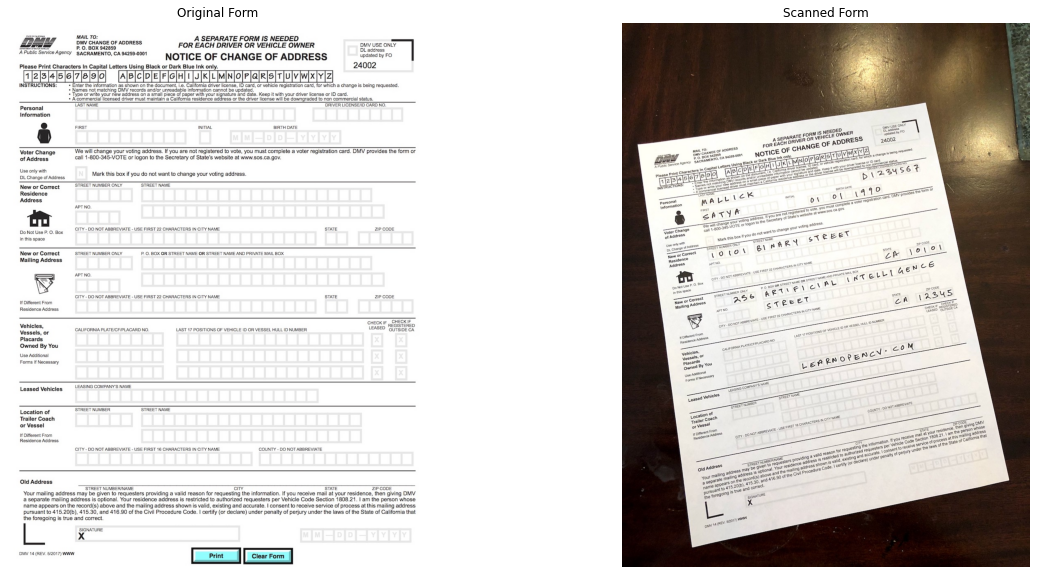

In [ ]:
# Display Images

plt.figure(figsize=[20,10]); 
plt.subplot(121); plt.axis('off'); plt.imshow(im1); plt.title("Original Form")
plt.subplot(122); plt.axis('off'); plt.imshow(im2); plt.title("Scanned Form")

## Step 2: Find keypoints in both Images

Think of keypoints as corner points that are stable under image transformations

In [ ]:
# Convert images to grayscale
im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
  

# Detect ORB features and compute descriptors.
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)

##

idx = 1
print ("keypoint angle: ", keypoints1[idx].angle)
print ("keypoint size:  ", keypoints1[idx].size)
print ("keypoint x:     ", keypoints1[idx].pt[0])
print ("keypoint y:     ", keypoints1[idx].pt[1])
print ("")
print ("descriptor: ", descriptors1[idx])
print ("")

# Display 
im1_display = cv2.drawKeypoints(im1, keypoints1, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display = cv2.drawKeypoints(im2, keypoints2, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


keypoint angle:  224.42335510253906
keypoint size:   31.0
keypoint x:      438.0
keypoint y:      1247.0

descriptor:  [  6  12 130 154  21 231 170  64  22   3  91   2  96 202  49  72  89  40
  19 145   2 180  26 255   1  38 138   0 148  11  48 130]



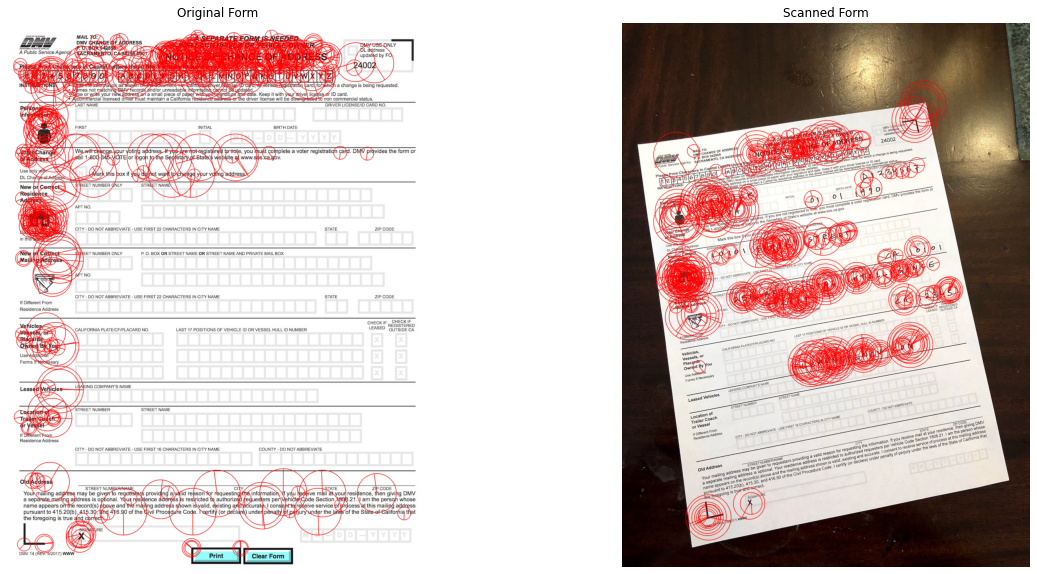

In [ ]:
plt.figure(figsize=[20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title("Original Form");
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title("Scanned Form");

## Step 3 : Match keypoints in the two image

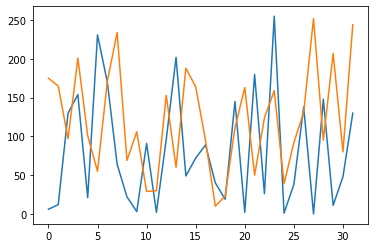

In [ ]:
# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)
  
# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matches) * 0.10)
matches = matches[:numGoodMatches]

##
d1 = descriptors1[1]
d2 = descriptors2[1]
plt.plot(d1)
plt.plot(d2)


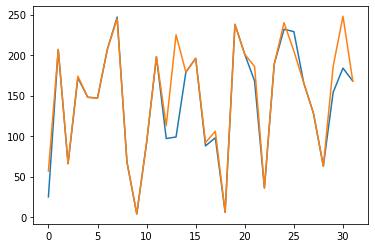

In [ ]:
idx = 0
d1 = descriptors1[matches[idx].queryIdx]
d2 = descriptors2[matches[idx].trainIdx]
plt.plot(d1)
plt.plot(d2)

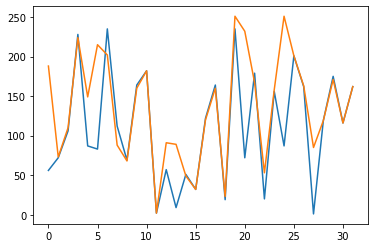

In [ ]:
idx = len(matches)-1
d1 = descriptors1[matches[idx].queryIdx]
d2 = descriptors2[matches[idx].trainIdx]
plt.plot(d1)
plt.plot(d2)

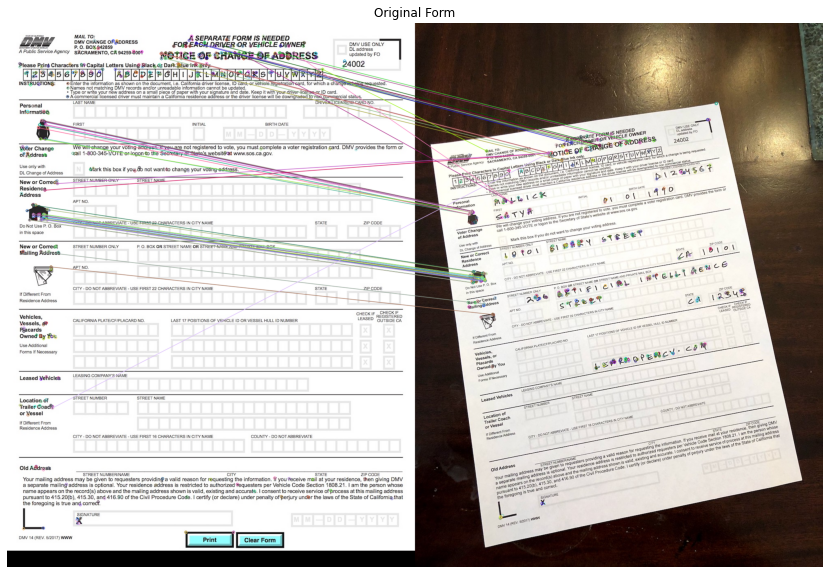

In [ ]:
# Draw top matches
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)

plt.figure(figsize=[40,10])
plt.imshow(im_matches); plt.axis('off'); plt.title("Original Form");


## Step 4:  Find Homography



In [ ]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
  points1[i, :] = keypoints1[match.queryIdx].pt
  points2[i, :] = keypoints2[match.trainIdx].pt
  
# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

idx = 10
print("Homography")
print(h)
print("")
print("Point-1 (template)")
print(points1[idx, :])
print("")
print("Point-2 (scan)")
print(points2[idx, :])
print("")

print("Express point-2 (scan) in homogeneous coordinates")
p2_homo = np.append(points2[idx, :],1)
print(p2_homo)
print("")

p1_homo = np.matmul(h,p2_homo.T)
print("p1_homo = H * p2_homo")
print(p1_homo)
print("")
print("Normalized p1_homo (template)")
print (p1_homo/p1_homo[2])

Homography
[[ 1.37229822e+00 -2.05727661e-01 -3.55314029e+00]
 [ 2.13175450e-01  1.48488141e+00 -4.68095383e+02]
 [-7.89380246e-05  9.66202337e-05  1.00000000e+00]]

Point-1 (template)
[ 89.579544 470.2926  ]

Point-2 (scan)
[163.81442 624.1537 ]

Express point-2 (scan) in homogeneous coordinates
[163.81442261 624.15368652   1.        ]

p1_homo = H * p2_homo
[ 92.84342293 493.62003936   1.04737469]

Normalized p1_homo (template)
[ 88.64394374 471.29269492   1.        ]


## Step 5: Warp image

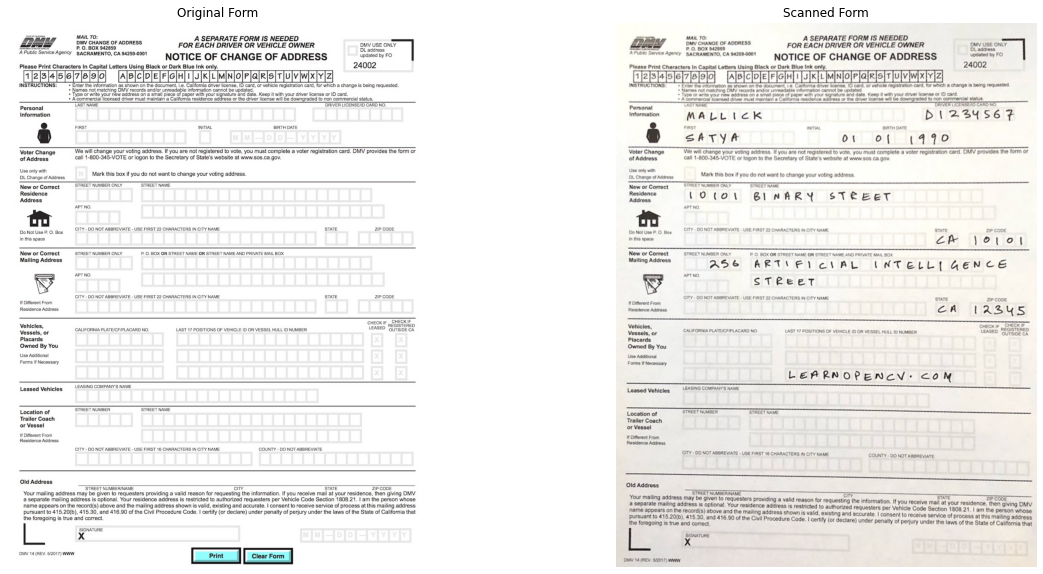

In [ ]:
# Use homography to warp image
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))
# Display results 
plt.figure(figsize=[20,10]); 
plt.subplot(121); plt.imshow(im1); plt.axis('off'); plt.title("Original Form");
plt.subplot(122); plt.imshow(im2_reg); plt.axis('off'); plt.title("Scanned Form");